# Test de la nouvelle classe TimeProblem sans saut de propriétés

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/")
save_fig = True

In [2]:
from src.main_discontinu import *
from src.plot_fields import *
from src.time_problem import *
from src.plot_stats import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)
rc("text.latex", preamble=r"\usepackage{siunitx}")

## Test des 3 opérateurs à maillage constant

Ici on va réaliser une simulation sans saut de propriété avec différents opérateurs de convection.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**8
t_fin_lim = 0.05

In [4]:
# d = 6./100*Delta/2.
dx = 0.06 / 30.0
phy_prop_conv = PhysicalProperties(
    Delta=1.0,
    v=1.0,
    dS=0.005**2,
    lda1=1.0,
    lda2=1.0,
    rho_cp1=1.0,
    rho_cp2=1.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=1.0,
    v=0.0,
    dS=0.005**2,
    lda1=1.0,
    lda2=1.0,
    rho_cp1=1.0,
    rho_cp2=1.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop_weno = NumericalProperties(
    dx=dx,
    schema="weno",
    time_scheme="euler",
    phy_prop=phy_prop_conv,
    cfl=0.3,
    fo=0.3,
)
num_prop_quick = NumericalProperties(
    dx=dx,
    schema="quick",
    time_scheme="euler",
    phy_prop=phy_prop_conv,
    cfl=0.3,
    fo=0.3,
)
num_prop_upwind = NumericalProperties(
    dx=dx,
    schema="upwind",
    time_scheme="euler",
    phy_prop=phy_prop_conv,
    cfl=0.3,
    fo=0.3,
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)


TOF
===
dt fourier
1.2e-06
Db / dx = 30
Monofluid convection :  weno

TOF
===
dt fourier
1.2e-06
Db / dx = 30
Monofluid convection :  weno

TOF
===
dt fourier
1.2e-06
Db / dx = 30
Monofluid convection :  quick

TOF
===
dt fourier
1.2e-06
Db / dx = 30
Monofluid convection :  upwind


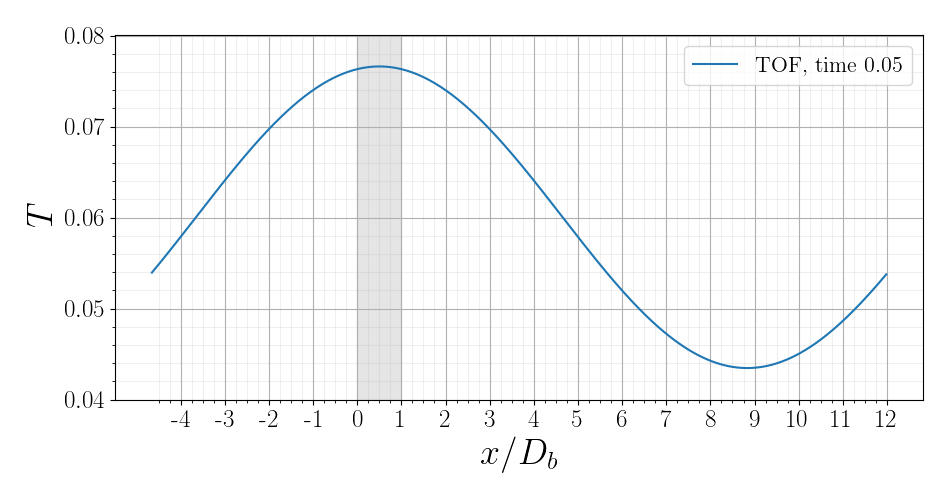

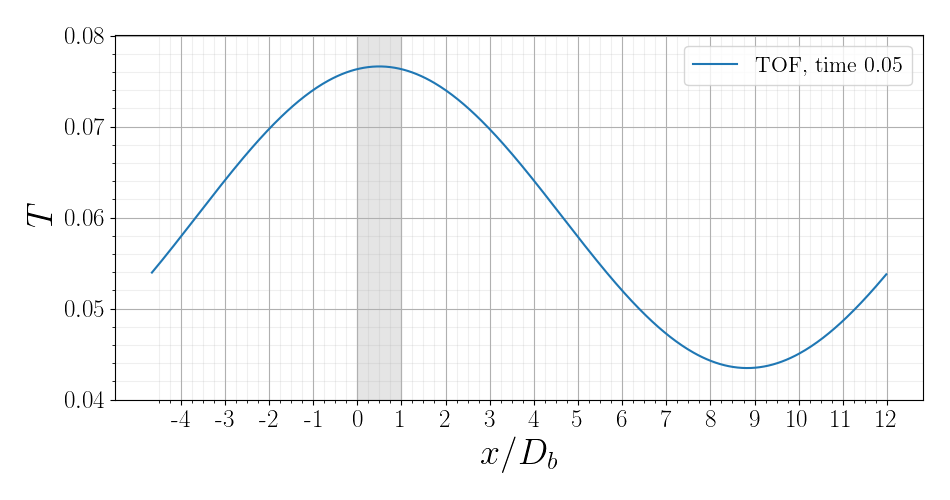

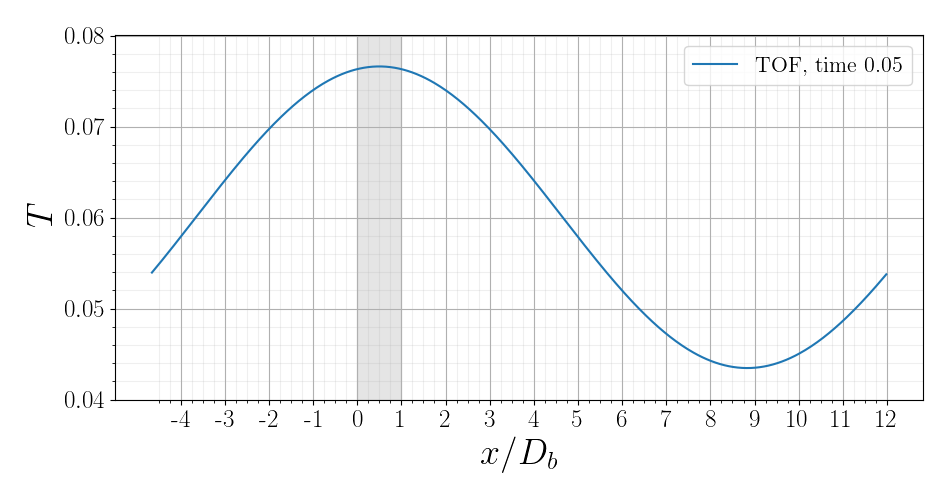

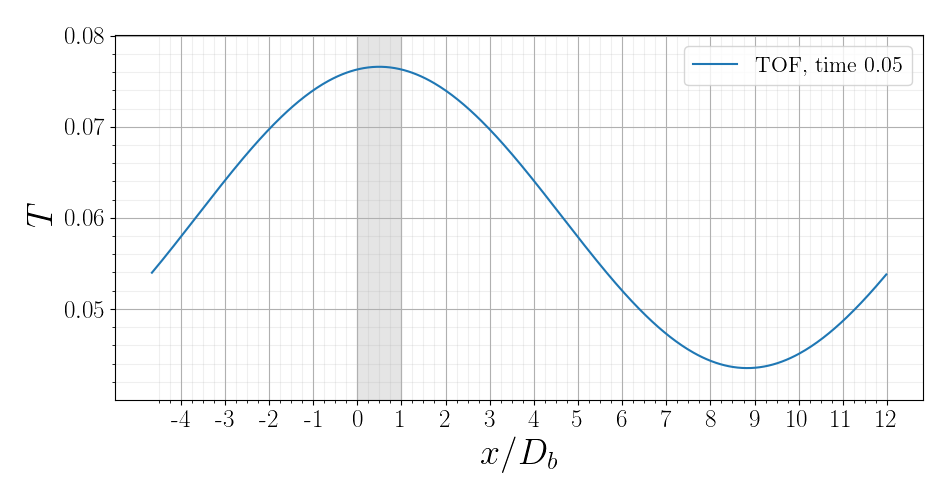

In [5]:
t_fin = 10.0

prob_clean_weno_ref = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno
)
t, e = prob_clean_weno_ref.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=Plotter("decale", ispretty=True),
)
prob_clean_weno = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
)
t, e = prob_clean_weno.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=Plotter("decale", ispretty=True),
)

prob_clean_quick = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
)
t, e = prob_clean_quick.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=Plotter("decale", ispretty=True),
)

prob_clean_upwind = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
)
t, e = prob_clean_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=Plotter("decale", ispretty=True),
)

'#d62728'

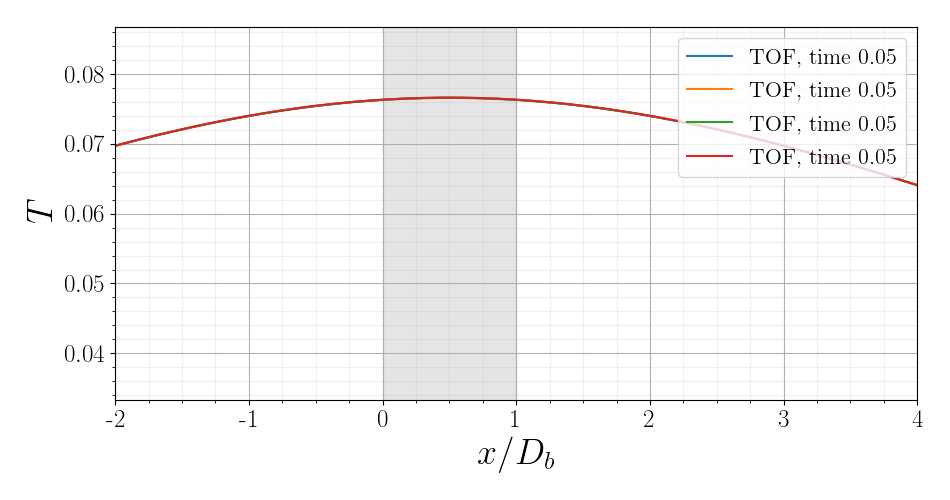

In [6]:
plot = Plotter("decale", ispretty=True, zoom=(-2, 4))
plot.plot(prob_clean_weno.problem_state)
plot.plot(prob_clean_quick.problem_state)
plot.plot(prob_clean_upwind.problem_state)
plot.plot(prob_clean_weno_ref.problem_state)


TOF
===
dE*/dt* = -8.47041e-21

TOF
===
dE*/dt* = -8.47041e-21

TOF
===
dE*/dt* = -1.27056e-20


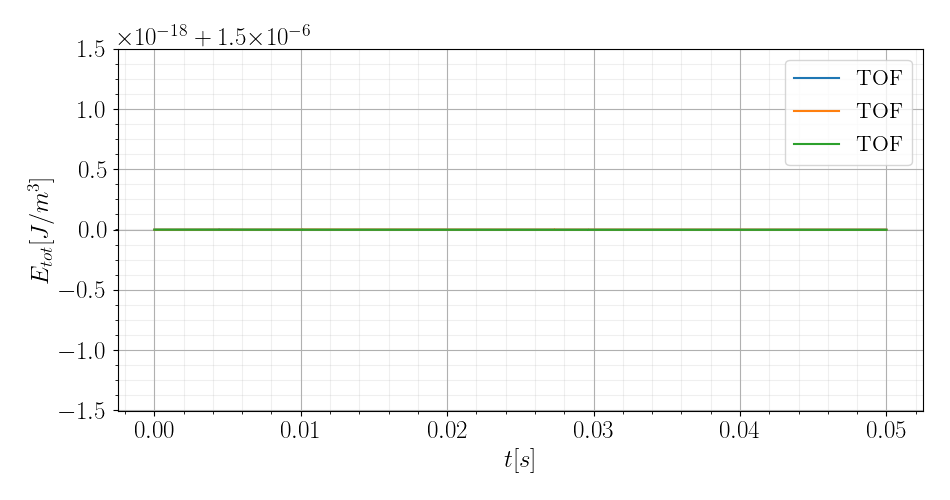

In [7]:
plot_en = EnergiePlot()
plot_en.plot_tpb(prob_clean_weno)
plot_en.plot_tpb(prob_clean_quick)
plot_en.plot_tpb(prob_clean_upwind)


$T_l$, TOF
dT/dt = 0.144017

$T_v$, TOF
dT/dt = -2.25627

$T_l$, TOF
dT/dt = 0.144017

$T_v$, TOF
dT/dt = -2.25627

$T_l$, TOF
dT/dt = 0.143941

$T_v$, TOF
dT/dt = -2.25507


(0.0, 1.0)

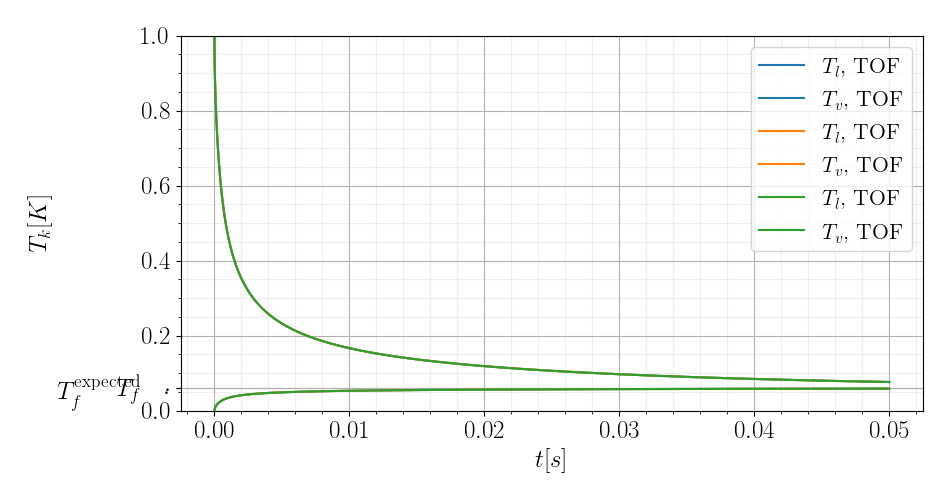

In [8]:
plot_T = TemperaturePlot()
plot_T.plot_tpb(prob_clean_weno)
plot_T.plot_tpb(prob_clean_quick)
plot_T.plot_tpb(prob_clean_upwind)
plot_T.add_T_final()
plot_T.ax.set_ylim(0, 1)

In [9]:
def plot_dTdt(stat, plot, **args):
    dTdt = np.gradient(stat.Tv, stat.t)
    plot.ax.plot(stat.t, dTdt, **args)

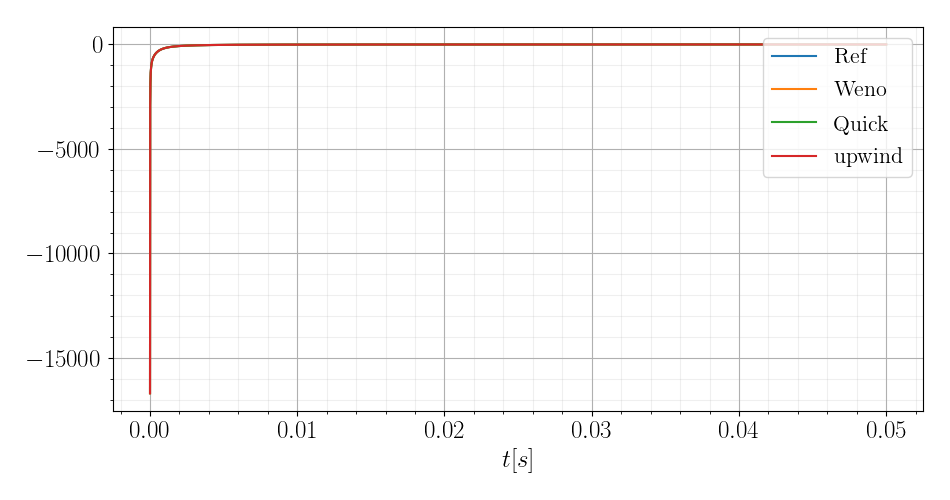

In [10]:
plot_dT = TimePlot()
plot_dTdt(prob_clean_weno_ref.stat, plot_dT, label="Ref")
plot_dTdt(prob_clean_weno.stat, plot_dT, label="Weno")
plot_dTdt(prob_clean_quick.stat, plot_dT, label="Quick")
plot_dTdt(prob_clean_upwind.stat, plot_dT, label="upwind")
le = plot_dT.ax.legend()
plot_dT.fig.tight_layout()

In [11]:
def plot_dTdtp(stat, plot, **args):
    dTdt = np.gradient(stat.Tv_pure, stat.t)
    plot.ax.plot(stat.t, dTdt, **args)

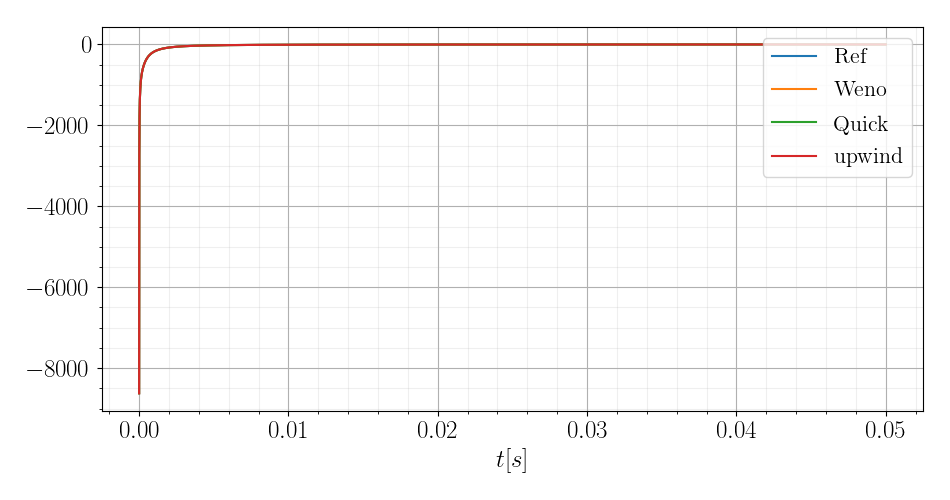

In [12]:
plot_dTp = TimePlot()
plot_dTdtp(prob_clean_weno_ref.stat, plot_dTp, label="Ref")
plot_dTdtp(prob_clean_weno.stat, plot_dTp, label="Weno")
plot_dTdtp(prob_clean_quick.stat, plot_dTp, label="Quick")
plot_dTdtp(prob_clean_upwind.stat, plot_dTp, label="upwind")
le = plot_dTp.ax.legend()
plot_dTp.fig.tight_layout()

In [13]:
def compute_nu(stat, phy_prop):
    dTdt = np.gradient(stat.Tl, stat.t)
    DeltaT = stat.Tv - stat.Tl
    nu = (
        phy_prop.rho_cp1
        * dTdt
        * phy_prop.Delta
        * phy_prop.alpha
        / (2.0 * phy_prop.lda1 * DeltaT)
    )
    return nu

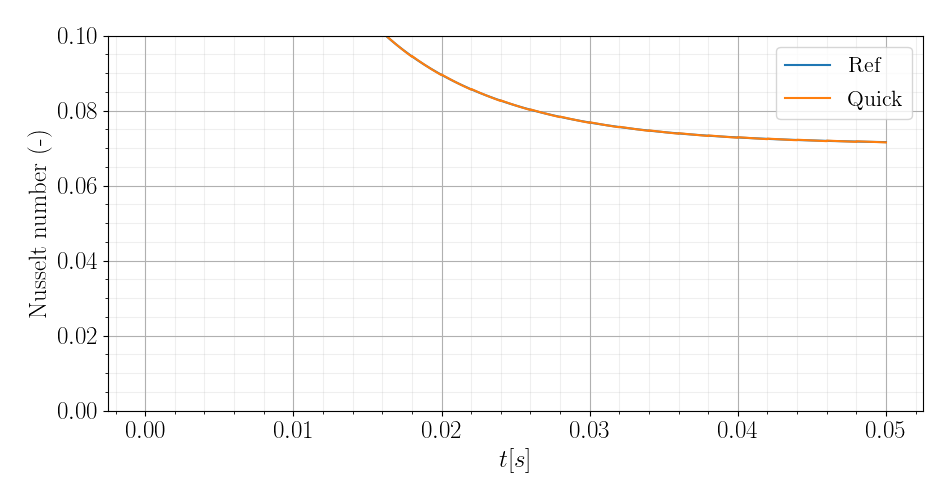

In [14]:
plot_Nu = TimePlot()
plot_Nu.ax.plot(
    prob_clean_weno_ref.stat.t,
    compute_nu(prob_clean_weno_ref.stat, phy_prop_no_conv),
    label=r"Ref",
)
plot_Nu.ax.plot(
    prob_clean_quick.stat.t,
    compute_nu(prob_clean_quick.stat, phy_prop_no_conv),
    label=r"Quick",
)
plot_Nu.ax.legend()
plot_Nu.ax.set_ylim(0.0, 0.1)
plot_Nu.ax.set_ylabel(r"Nusselt number (-)")
plot_Nu.fig.tight_layout()